In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt

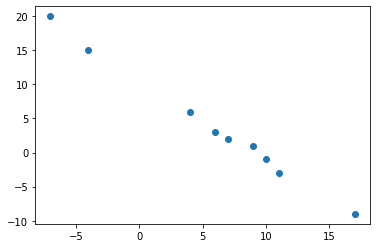

In [ ]:
x = np.array([-7.0,-4.0,4.0,6.0,7.0,9.0,10.0,11.0])
y = np.array([20.0,15.0,6.0,3.0,2.0,1.0,-1.0,-3.0])
x2 = np.array([-7.0,-4.0,4.0,6.0,7.0,9.0,10.0,11.0,17.0])
y2 = np.array([20.0,15.0,6.0,3.0,2.0,1.0,-1.0,-3.0,-9.0])
plt.scatter(x2,y2)
x = tf.constant(x)
y = tf.constant(y)
x_shape , y_shape = x.shape[0], y.shape[0]

In [ ]:
#housing price prediction problem

house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant(939700)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
              metrics = ['mae'])
model.fit(tf.expand_dims(x,axis = -1),y,epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 7.6339 - mae: 7.6339
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6212 - mae: 7.6212
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6085 - mae: 7.6085
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5958 - mae: 7.5958
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5831 - mae: 7.5831
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5704 - mae: 7.5704
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5576 - mae: 7.5576
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 7.5449 - mae: 7.5449
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5322 - mae: 7.5322
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5195 - mae: 7.5195
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 293ms/step


array([[-4.2781806]], dtype=float32)

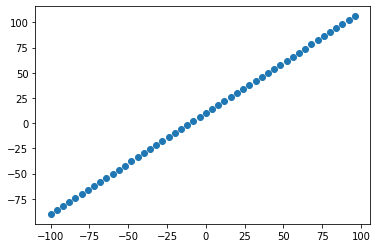

In [ ]:
X = tf.range(-100,100,4)
Y = X + 10 
plt.scatter(X,Y)

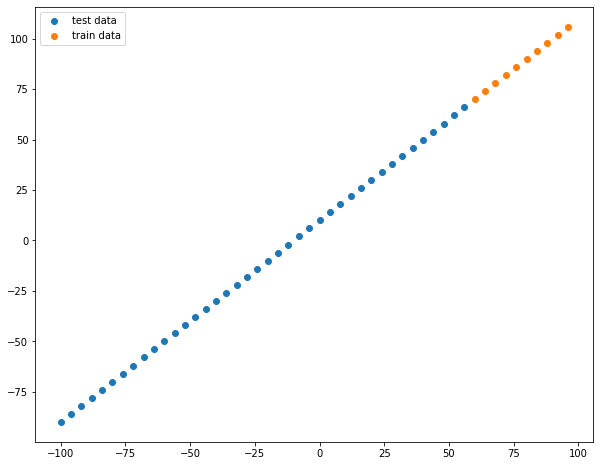

In [ ]:
x_train = X[:40]
y_train = Y[:40]

x_test = X[40:]
y_test = Y[40:]

plt.figure(figsize = (10,8))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.legend(['test data', 'train data'])



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'),
    tf.keras.layers.Dense(1, input_shape = [1], name = 'output_layer')
],name = 'model_1')
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)
model.summary()
model.fit(x_train, y_train, epochs = 300, verbose = 0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total paramters - total number of parameters in the model
Trainable parameters - these are the parameters the model can update as it trains
Non - trainable parameters - parameters that aren't upadated during the training


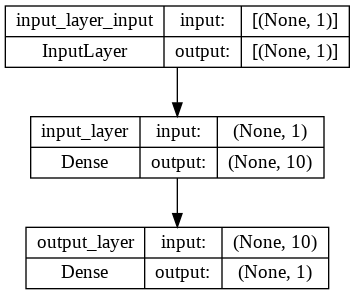

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)


Visualization of models predictions


1/1 [==============================] - 0s 86ms/step


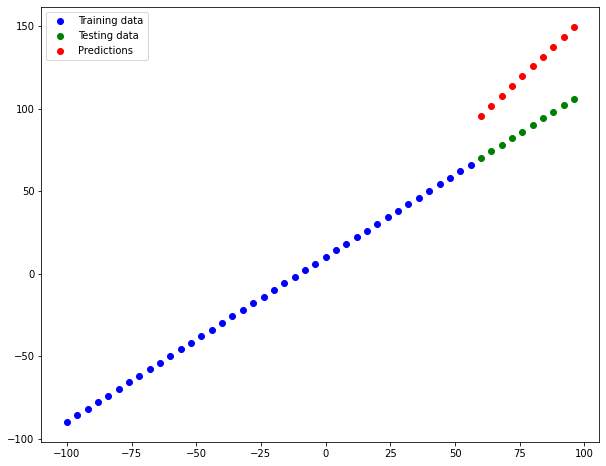

In [ ]:
#Make predictions

y_pred = model.predict(x_test)
y_pred

def plot_predictions(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions = y_pred):
  plt.figure(figsize = (10,8))
  plt.scatter(train_data,train_labels, c = 'b', label = 'Training data')
  plt.scatter(test_data,test_labels, c = 'g', label = 'Testing data')
  plt.scatter(test_data,predictions, c = 'r', label = 'Predictions')
  plt.legend()
plot_predictions()

In [ ]:
#with regression problem two main metrics are mae and mse
model.evaluate(x_test,y_test)
#model absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.constant(y_pred))
mae 
y_pred = tf.constant(y_pred)
y_test = tf.cast(y_test, dtype = tf.float32)
y_pred = tf.squeeze(y_pred)
print(tf.reduce_sum(y_pred - y_test)/y_pred.shape[0])

1/1 [==============================] - 0s 234ms/step - loss: 34.4669 - mae: 34.4669
tf.Tensor(34.46687, shape=(), dtype=float32)


In [ ]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.constant(y_pred))
print(mse)
print(tf.reduce_sum((y_pred - y_test)**2)/y_pred.shape[0])

tf.Tensor(1221.9705, shape=(), dtype=float32)
tf.Tensor(1221.9705, shape=(), dtype=float32)


In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = y_pred)

In [ ]:
#Experiments to improve our model
tf.random.set_seed(42)

model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])
model1.fit(tf.expand_dims(x_train,axis = -1),y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 160ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

1/1 [==============================] - 0s 34ms/step
tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.5734, shape=(), dtype=float32)


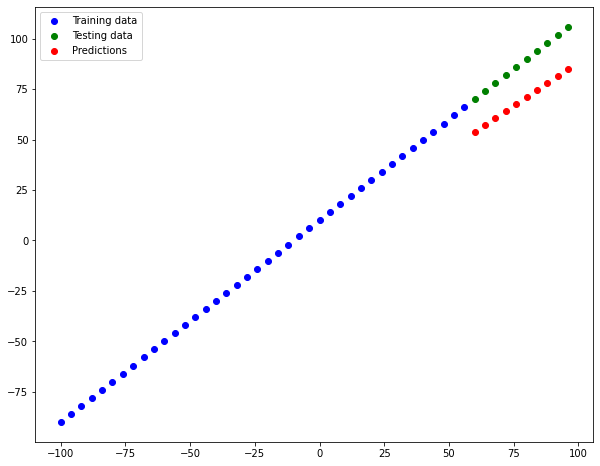

In [ ]:
y_preds1 = model1.predict(x_test)
plot_predictions(x_train,y_train,x_test,y_test, y_preds1)
mae1 = mae(y_test,tf.squeeze(y_preds1))
mse1 = mse(y_test,tf.squeeze(y_preds1))
print(mae1)
print(mse1)

1/1 [==============================] - 0s 38ms/step
tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.5734, shape=(), dtype=float32)


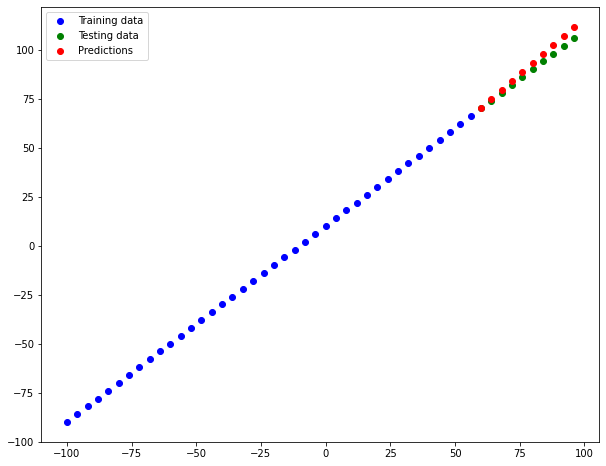

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)])
model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])
model2.fit(tf.expand_dims(x_train,axis = -1),y_train,epochs = 100,verbose = 0)
y_preds2 = model2.predict(x_test)
plot_predictions(x_train,y_train,x_test,y_test, y_preds2)
mae2 = mae(y_test,tf.squeeze(y_preds2))
mse2 = mse(y_test,tf.squeeze(y_preds2))
print(mae1)
print(mse1)

1/1 [==============================] - 0s 42ms/step
tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.5734, shape=(), dtype=float32)


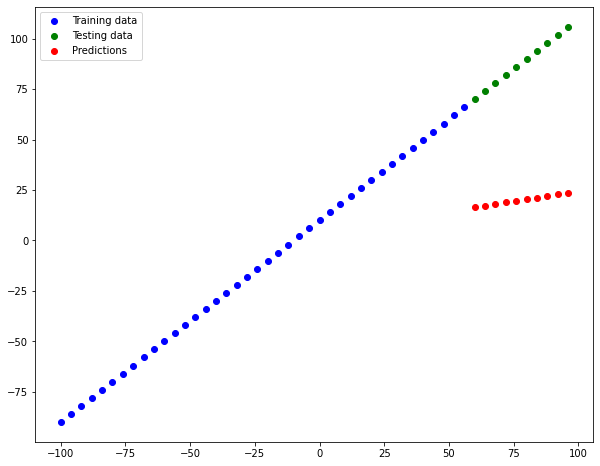

In [ ]:
model3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)])
model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])
model3.fit(tf.expand_dims(x_train,axis = -1),y_train,epochs = 500,verbose = 0)
y_preds3 = model3.predict(x_test)
plot_predictions(x_train,y_train,x_test,y_test, y_preds3)
mae3 = mae(y_test,tf.squeeze(y_preds3))
mse3 = mse(y_test,tf.squeeze(y_preds3))
print(mae1)
print(mse1)

In [ ]:
model_results =[["model1", mae1.numpy(), mse1.numpy()],
                ["model2", mae2.numpy(), mse2.numpy()],
                ["model3", mae3.numpy(), mse3.numpy()]]
results = pd.DataFrame(model_results, columns = ['model','mae', 'mse'])
results

,model,mae,mse
0,model1,18.745327,353.573395
1,model2,3.111021,12.497230
2,model3,67.909554,4696.062500


While building models look into:
- tensorboard
- weights & biases



In [ ]:
model2.save('best_model_Savemodel_format')
model2.save('best_model_h5model_format.h5')

In [ ]:
new_model_2 = tf.keras.models.load_model('best_model_h5model_format.h5')
new_model_2.summary(
)
model2_preds = model2.predict(x_test)
new_model_2_preds = new_model_2.predict(x_test)
new_model_2_preds == model2_preds

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Bigger example


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
encoded_dataframe = pd.get_dummies(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
x = encoded_dataframe.drop('charges',axis = 1)
y = encoded_dataframe['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x,y)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

In [ ]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

insurance_model.fit(x_train, y_train, epochs = 500, verbose = 0)
# ins_pred = insurance_model.predict(x_test)
# print(mae(ins_pred,y_test))
# print(mse(ins_pred,y_test))

In [ ]:
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

insurance_model2.fit(x_train, y_train, epochs = 200, verbose = 0)

In [ ]:
insurance_model.evaluate(x_test,y_test)
insurance_model2.evaluate(x_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3641.9600 - mae: 3641.9600


[3641.9599609375, 3641.9599609375]

Preprocessing data

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                             (OneHotEncoder(handle_unknown = 'ignore'), ['sex','smoker','region']))

X = insurance.drop('charges', axis = 1)
Y = insurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

insurance_model4.fit(X_train_normal, Y_train, epochs = 200, verbose = 0)

In [ ]:
insurance_model4.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3391.8132 - mae: 3391.8132


[3391.813232421875, 3391.813232421875]